<a href="https://colab.research.google.com/github/akhileshmanukonda/bert-model/blob/main/reasearch_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research and analysis of a Bert pretrained model**

1.   List item
2.   List item


from hugging face analyzing a pretrained bert model.BERT is a very effective tool for text categorisation because of its capacity to comprehend the relationships and context inside text. Through task-specific tweaking of BERT, practitioners may take use of cutting-edge NLP capabilities to get excellent classification accuracy for text data.

In [1]:
pip install transformers

In [2]:
pip install torch

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 405.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


here iam starts with importing libraries and writing code for some text classification tasks


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset

model_name = "bert-base-cased"
# Use AutoModelForSequenceClassification for text classification tasks
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

classifier(
    [
        "jake broke the vase",

    ]
)
sequences = [
    "jake broke the vase\n\nThe vise. This is really a great idea for the Vise\
    I have tried to create and I'm really hoping to see it being incorporated into the Vise."]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

batch["labels"] = torch.tensor([1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [5]:
generator = pipeline("text-generation")
generator("jake broke the vase")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "jake broke the vase in the middle of the road. It ended up in the trash and she wasn't even sure whether to run or not. She had no idea why.\n\nSara looked at the clock that had been ticking on"}]

In [6]:
#load dataset
ds = load_dataset("liuyanchen1015/MULTI_VALUE_mrpc_for_to")
print (ds)

# Load the dataset
dataset = load_dataset("liuyanchen1015/MULTI_VALUE_mrpc_for_to")

# Convert to pandas DataFrame for easier manipulation
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()


README.md:   0%|          | 0.00/631 [00:00<?, ?B/s]

(…)-00000-of-00001-8c6b395e4f7f1dc6.parquet:   0%|          | 0.00/206k [00:00<?, ?B/s]

(…)-00000-of-00001-7adb976102fd28bc.parquet:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

(…)-00000-of-00001-90aec5406e13b436.parquet:   0%|          | 0.00/98.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1106 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/134 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/514 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 1106
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 134
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score'],
        num_rows: 514
    })
})


In [7]:
# Display the first few rows of the training set
print(train_df.head())

# Display basic information about the training set
print(train_df.info())

# Check for missing values
print(train_df.isnull().sum())


                                           sentence1  \
0  Around 0335 GMT , Tab shares were up 19 cents ...   
1  The stock rose $ 2.11 , or about 11 percent , ...   
2  Legislation making it harder for consumers for...   
3  He told The Sun newspaper that Mr. Hussein 's ...   
4  Gyorgy Heizler , head of the local disaster un...   

                                           sentence2  label  idx  value_score  
0  Tab shares jumped 20 cents , or 4.6 % , for to...      0    3            1  
1  PG & E Corp. shares jumped $ 1.63 or 8 percent...      1    4            1  
2  Legislation making it harder for consumers for...      0   11            2  
3  " Saddam 's daughters had British schools and ...      1   14            2  
4  The head of the local disaster unit , Gyorgy H...      0   15            1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  --

In [8]:
# Get descriptive statistics for the dataset
print(train_df.describe())

# Check the distribution of the labels
print(train_df['label'].value_counts())


             label          idx  value_score
count  1106.000000  1106.000000  1106.000000
mean      0.716094  1993.498192     1.847197
std       0.451096  1157.622656     0.858904
min       0.000000     3.000000     1.000000
25%       0.000000  1027.500000     1.000000
50%       1.000000  1942.500000     2.000000
75%       1.000000  2977.500000     2.000000
max       1.000000  4073.000000     6.000000
label
1    792
0    314
Name: count, dtype: int64


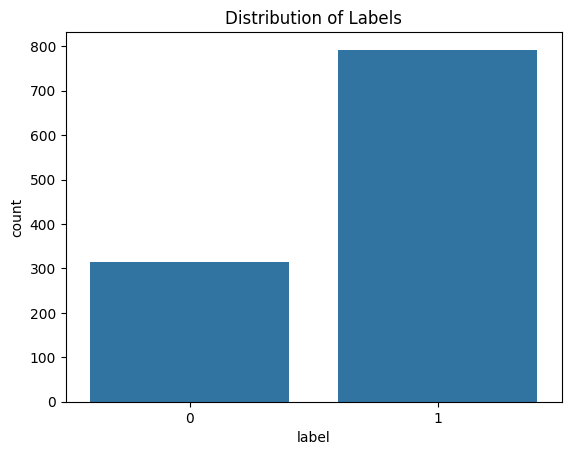

In [9]:
# Plot the distribution of the labels
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Labels')
plt.show()


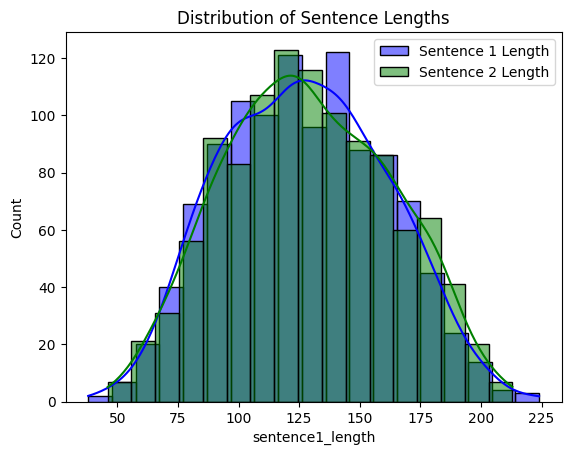

In [10]:
# Calculate the length of each sentence
train_df['sentence1_length'] = train_df['sentence1'].apply(len)
train_df['sentence2_length'] = train_df['sentence2'].apply(len)

# Plot the distribution of sentence lengths
sns.histplot(train_df['sentence1_length'], kde=True, color='blue', label='Sentence 1 Length')
sns.histplot(train_df['sentence2_length'], kde=True, color='green', label='Sentence 2 Length')
plt.legend()
plt.title('Distribution of Sentence Lengths')
plt.show()


In [11]:
# Check for duplicate rows
duplicates = train_df.duplicated(subset=['sentence1', 'sentence2']).sum()
print(f"Number of duplicate sentence pairs: {duplicates}")


Number of duplicate sentence pairs: 0


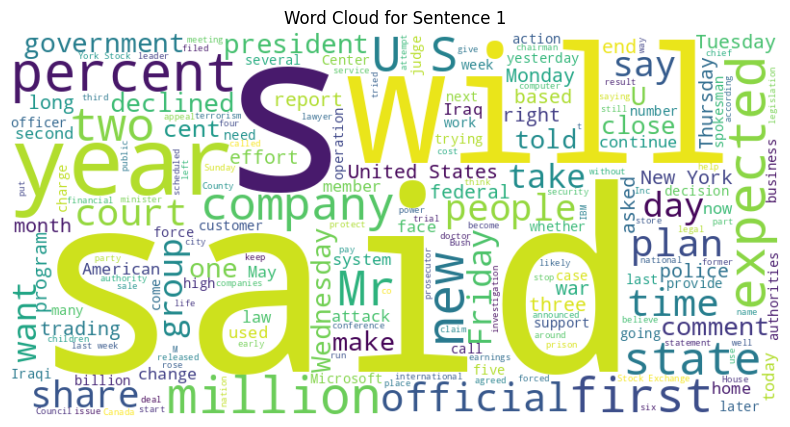

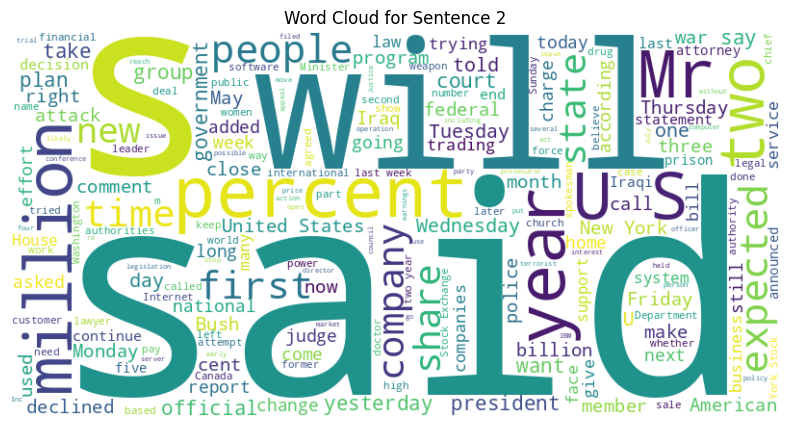

In [12]:
from wordcloud import WordCloud

# Generate a word cloud for the first sentences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['sentence1']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentence 1')
plt.show()

# Generate a word cloud for the second sentences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['sentence2']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentence 2')
plt.show()



In [13]:
train_set = ds["train"]
train_set[0]


train_set.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'idx': Value(dtype='int64', id=None),
 'value_score': Value(dtype='int64', id=None)}

In [14]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# Access the correct columns within the train_set Dataset
tokenized_sentences_1 = tokenizer(train_set["sentence1"])
tokenized_sentences_2 = tokenizer(train_set["sentence2"])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
inputs = tokenizer('Around 0335 GMT , Tab shares was up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .',
 'Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .')
inputs

{'input_ids': [101, 2105, 6021, 19481, 13938, 2102, 1010, 21628, 6661, 2001, 2039, 2539, 16653, 1010, 2030, 1018, 1012, 1018, 1003, 1010, 2012, 1037, 1002, 1018, 1012, 5179, 1010, 2383, 3041, 2275, 1037, 2501, 2152, 1997, 1037, 1002, 1018, 1012, 5401, 1012, 102, 21628, 6661, 5598, 2322, 16653, 1010, 2030, 1018, 1012, 1020, 1003, 1010, 2000, 2275, 1037, 2501, 5494, 2152, 2012, 1037, 1002, 1018, 1012, 5401, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [16]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]',
 'around',
 '03',
 '##35',
 'gm',
 '##t',
 ',',
 'tab',
 'shares',
 'was',
 'up',
 '19',
 'cents',
 ',',
 'or',
 '4',
 '.',
 '4',
 '%',
 ',',
 'at',
 'a',
 '$',
 '4',
 '.',
 '56',
 ',',
 'having',
 'earlier',
 'set',
 'a',
 'record',
 'high',
 'of',
 'a',
 '$',
 '4',
 '.',
 '57',
 '.',
 '[SEP]',
 'tab',
 'shares',
 'jumped',
 '20',
 'cents',
 ',',
 'or',
 '4',
 '.',
 '6',
 '%',
 ',',
 'to',
 'set',
 'a',
 'record',
 'closing',
 'high',
 'at',
 'a',
 '$',
 '4',
 '.',
 '57',
 '.',
 '[SEP]']

In [17]:
tokenized_dataset = tokenizer(
    train_set["sentence1"],
    train_set["sentence2"],
    padding=True,
    truncation=True,
)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [18]:
tokenized_datasets = train_set.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/1106 [00:00<?, ? examples/s]

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx', 'value_score', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1106
})

In [19]:
import wandb
wandb.init(project="reasearch_ass3")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [20]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")


model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=3e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [31]:
# Assuming 'train_set' is your entire dataset, split it first
from datasets import DatasetDict
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}



# Adjust split ratio as needed
train_testvalid = train_set.train_test_split(test_size=0.2)
train_valid = train_testvalid['test'].train_test_split(test_size=0.5)

# Create a DatasetDict
tokenized_datasets = DatasetDict({
    'train': train_testvalid['train'],
    'validation': train_valid['test'],
    'test': train_valid['train']
})

# Adjust TrainingArguments
training_args = TrainingArguments(
    output_dir="./model_output",
    run_name="unique_run_name",
    save_strategy= "epoch",
    logging_dir="./logs",
    logging_steps=100,
    report_to="wandb",
    )
# Apply tokenization
tokenized_datasets = tokenized_datasets.map(tokenize_function, batched=True)
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-31-70f1584d3304>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [32]:
import numpy as np
trainer.train()


Step,Training Loss
50,0.063300
100,0.193400
150,0.053900
200,0.016700
250,0.010000
300,0.000100


TrainOutput(global_step=333, training_loss=0.050681300255730075, metrics={'train_runtime': 105.2552, 'train_samples_per_second': 25.196, 'train_steps_per_second': 3.164, 'total_flos': 101293645203360.0, 'train_loss': 0.050681300255730075, 'epoch': 3.0})

In [24]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(111, 2) (111,)


In [25]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [26]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00


In [27]:
import evaluate

metric = evaluate.load("f1")
metric.compute(predictions=preds, references=predictions.label_ids)
print(metric)

EvaluationModule(name: "f1", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    labels (`list` of `int`): The set of labels to include when `average` is not set to `'binary'`, and the order of the labels if `average` is `None`. Labels present in the data can be excluded, for example to calculate a multiclass average ignoring a majority negative class. Labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in `predictions` and `references` are used in sorted order. Defaults to None.
    pos_label (`int`): The class to be considered the positive class, in the case where `average` is set to `binary`. Defaults to 1.
    average (`string`): This parameter is required for multiclass/multilabel t

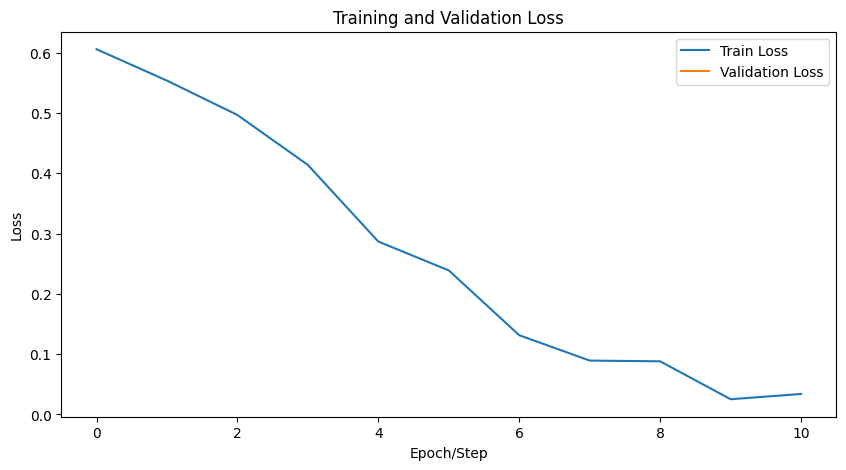

In [28]:
# Assuming trainer.state.log_history contains the training history
train_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
# Extract validation loss if available (e.g., using 'eval_loss')
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch/Step')
plt.ylabel('Loss')
plt.legend()
plt.show()